# a) Library Installation

In [1]:
pip install yfinance

# b) Downloading the Bitcoin Prices

In [2]:
import yfinance as yf
train_data = yf.download("BTC-USD", start="2019-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


In [3]:
type(train_data)

pandas.core.frame.DataFrame

In [4]:
train_data['Open']

Date
2019-01-01     3746.713379
2019-01-02     3849.216309
2019-01-03     3931.048584
2019-01-04     3832.040039
2019-01-05     3851.973877
                  ...     
2023-12-27    42518.468750
2023-12-28    43468.199219
2023-12-29    42614.644531
2023-12-30    42091.753906
2023-12-31    42152.097656
Name: Open, Length: 1826, dtype: float64

In [5]:
test_data = yf.download("BTC-USD", start="2024-01-01", end="2024-05-02")

[*********************100%%**********************]  1 of 1 completed


# c) Ploting train and test data

In [6]:
import matplotlib.pyplot as plt

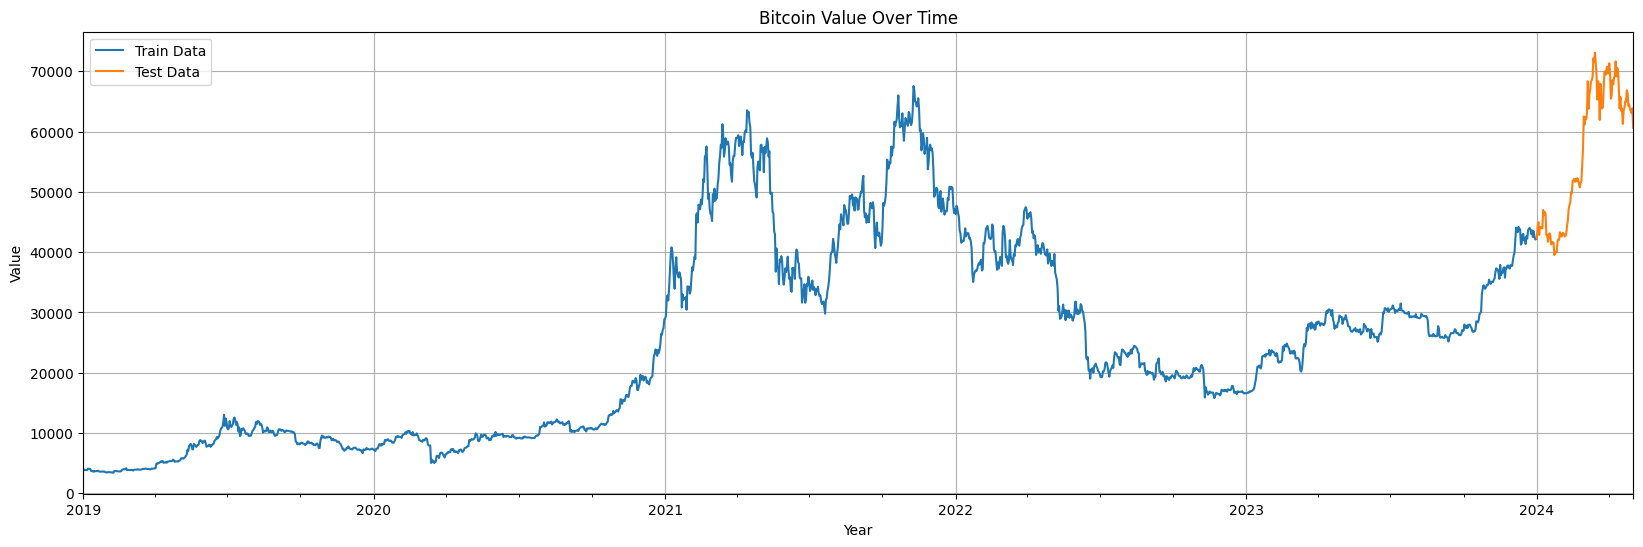

In [7]:
plt.figure(figsize=(20, 6))
train_data['Open'].plot(label='Train Data')
test_data['Open'].plot(label='Test Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Bitcoin Value Over Time')
plt.legend()
plt.grid(True)
plt.show()

# d) Scaling the data

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data[['Open']])
train_data_scaled = scaler.transform(train_data[['Open']])
test_data_scaled = scaler.transform(test_data[['Open']])

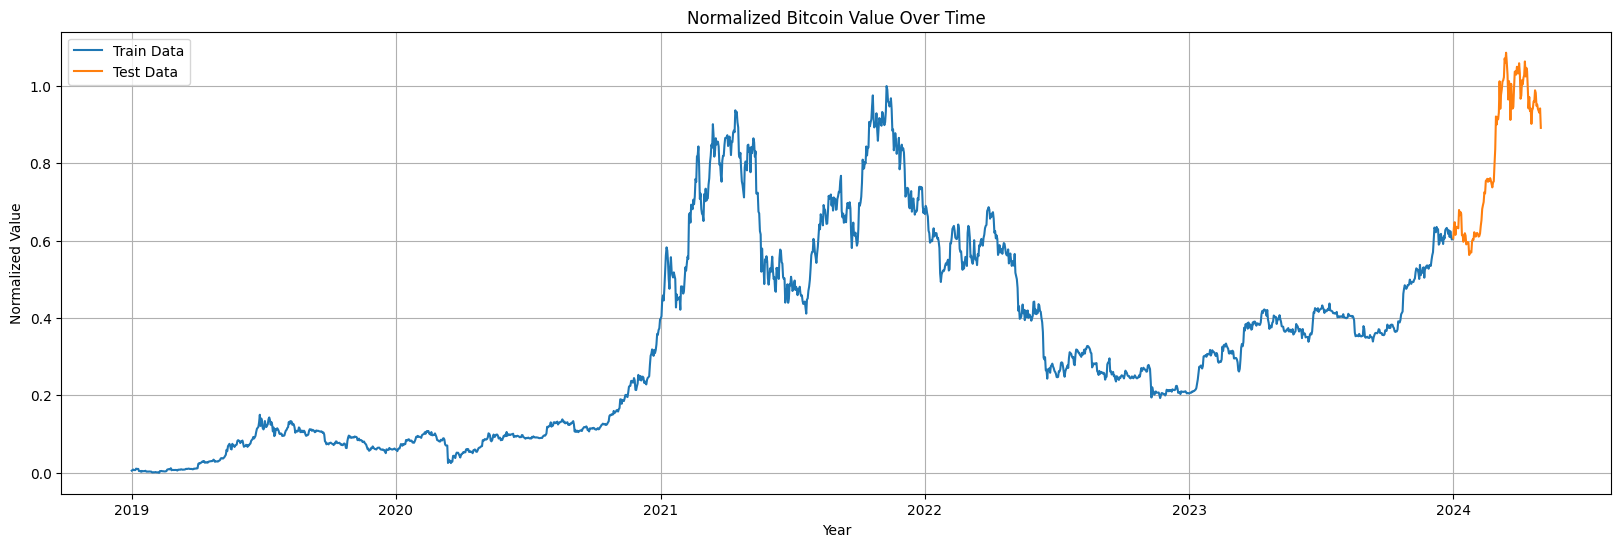

In [9]:
# Plotting the normalized train and test data:
plt.figure(figsize=(20, 6))
plt.plot(train_data.index, train_data_scaled, label='Train Data')
plt.plot(test_data.index, test_data_scaled, label='Test Data')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Normalized Bitcoin Value Over Time')
plt.legend()
plt.grid(True)
plt.show()

# e) Data Collection

In [11]:
import numpy as np

In [12]:
timestep = 60
x_train = []
y_train = []

for i in range(timestep, train_data_scaled.shape[0]):
    x_train.append(train_data_scaled[i-timestep:i, 0])
    y_train.append(train_data_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1) #reshaping for RNN
print("x-train-shape= ", x_train.shape)
print("y-train-shape= ", y_train.shape)

x-train-shape=  (1766, 60, 1)
y-train-shape=  (1766,)


# f) Building the model

In [17]:
import pandas as pd
import warnings
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten
warnings.filterwarnings("ignore")

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))

# g) Training

In [19]:
from sklearn.metrics import mean_absolute_error

model.compile(loss = "mean_squared_error", optimizer = "adam")
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
56/56 [==============================] - 10s 16ms/step - loss: 0.0191
Epoch 2/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0033
Epoch 3/100
56/56 [==============================] - 1s 15ms/step - loss: 0.0030
Epoch 4/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0027
Epoch 5/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0029
Epoch 6/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0025
Epoch 7/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0024
Epoch 8/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0023
Epoch 9/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0022
Epoch 10/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0018
Epoch 11/100
56/56 [==============================] - 1s 14ms/step - loss: 0.0018
Epoch 12/100
56/56 [==============================] - 1s 16ms/step - loss: 0.0019
Epoch 13/100
56/56 [====

# h) Preparing test data for prediction and testing the model

In [20]:
# Extracting the last 60 elements of the train_data_scaled
last_60_train = train_data_scaled[-60:]

# Concatenating the last 60 elements of train_data_scaled to the beginning of test_data_scaled
concatenated_test_data = np.concatenate((last_60_train, test_data_scaled), axis=0)

In [21]:
x_test=[]
for i in range(timestep, concatenated_test_data.shape[0]):
    x_test.append(concatenated_test_data[i-timestep:i, 0])

x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [22]:
x_test

array([[[0.49947033],
        [0.49168985],
        [0.48847623],
        ...,
        [0.61129029],
        [0.60313902],
        [0.60407971]],

       [[0.49168985],
        [0.48847623],
        [0.49398981],
        ...,
        [0.60313902],
        [0.60407971],
        [0.60607721]],

       [[0.48847623],
        [0.49398981],
        [0.49328484],
        ...,
        [0.60407971],
        [0.60607721],
        [0.63580371]],

       ...,

       [[0.92126765],
        [0.90051699],
        [0.92021492],
        ...,
        [0.95223006],
        [0.94078187],
        [0.93567694]],

       [[0.90051699],
        [0.92021492],
        [0.91397822],
        ...,
        [0.94078187],
        [0.93567694],
        [0.93073289]],

       [[0.92021492],
        [0.91397822],
        [0.93121055],
        ...,
        [0.93567694],
        [0.93073289],
        [0.94216038]]])

**Testing the model**





In [23]:
predicted_data = model.predict(x_test)

4/4 [==============================] - 1s 10ms/step


In [25]:
predicted_data_inverse_transform = scaler.inverse_transform(predicted_data)

**Ploting the result**

In [27]:
data_test = np.array(test_data[['Open']])
data_test = data_test.reshape(len(data_test), 1)

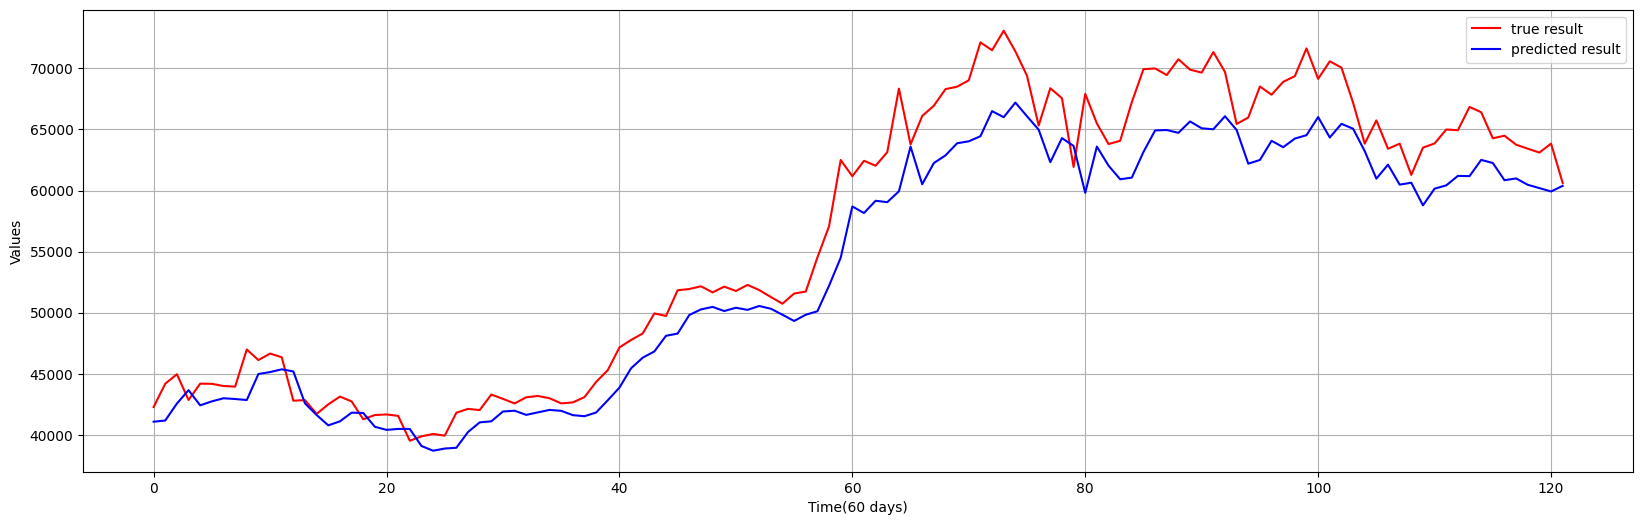

In [28]:
plt.figure(figsize = (20,6), facecolor = 'w', edgecolor = 'k')
plt.plot(data_test, color = "r", label = "true result")
plt.plot(predicted_data_inverse_transform, color = "b", label = "predicted result")
plt.legend()
plt.xlabel("Time(60 days)")
plt.ylabel("Values")
plt.grid(True)
plt.show()